In [1]:
import sys
sys.path.insert(0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import ndimage

In [3]:
#this is based on the decision tree
#Since Decision tree tends to overfit , so not good generalization performance
#So Random Forest are better

#Random forest are going to make a lot of decision tree , that are different from each other 
#then use the decision tree to predict the target value
#Two ways used to create the different trees bootstrap sampling and random feature selection
#In bootstrap sampling , different datasets are used for training
#in random feature selection , only the best features are selected from a subset of the features at each node
#So to make the random forest two features are used
#n_estimators ; to mention the number of trees
#max_features ; to select a subset of max_features number of features randomly and then using the best feature at every node

#importing the dataset
from sklearn.datasets import make_moons
X , y = make_moons (n_samples = 100 , random_state = 3 , noise = 0.25)
#noise is SD of the gaussian noise

In [4]:
#analysing the shape of the data set
print("Shape of X : " , X.shape)
print("Shape of y : " , y.shape)

Shape of X :  (100, 2)
Shape of y :  (100,)


In [5]:
#plotting the datap point
def plot_data_points():
    class0 = np.ones((0 , 2))
    class1 = np.ones((0 , 2))
    for indices in range(X.shape[0]):
        if (y[indices] == 0):
            class0 = np.vstack((class0 , np.array(X[indices])))
        else:
            class1 = np.vstack((class1 , np.array(X[indices])))
    plt.plot(class0[: , 0] , class0[: , 1] , 'o' , label = "class 0")
    plt.plot(class1[: , 0] , class1[: , 1] , 'r^' , label = "class 1")
    plt.xlabel('Feature 1')
    plt.ylabel("feature 2")
    

Text(0.5,1,'Data points')

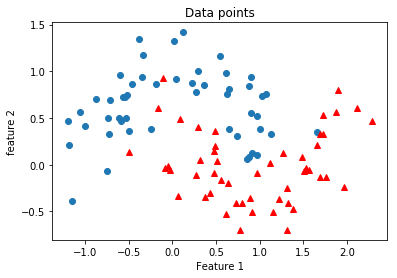

In [6]:
plot_data_points()
plt.title('Data points')

In [7]:
#importing the model and splitting the data set
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train , X_test , y_train , y_test = train_test_split(X , y)

In [8]:
#printing the details of X_train and X_test
print("Shape of X_train : " , X_train.shape)
print("Shape of X_test : " , X_test.shape)

Shape of X_train :  (75, 2)
Shape of X_test :  (25, 2)


In [9]:
#fitting the data
#we can do pruning in here as well
forest = RandomForestClassifier (n_estimators = 5 , random_state = 2)
forest.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [10]:
#each tree is stored in forest.estimators
def plot_tree_predictor(tree):
    eps = 0.5
    x_min , x_max = X[: , 0].min() - eps , X[: , 0].max() + eps
    y_min , y_max = X[: , 1].min() - eps , X[: , 1].max() + eps
    xx = np.linspace (x_min , x_max , 100)
    yy = np.linspace (y_min , y_max , 100)

    X1 , X2 = np.meshgrid (xx , yy)
    X_grid = np.c_[X1.ravel() , X2.ravel()]

    Z = tree.predict(X_grid).reshape(X1.shape)

    faces = tree.apply(X_grid)
    faces = faces.reshape(X1.shape)
    border = ndimage.laplace(faces) != 0

    plot_data_points()
    plt.contourf(X1 , X2 , Z , alpha = 0.5 )
    plt.scatter(X1[border] , X2[border] , marker = '.' , s = 1)

Text(0.5,1,'Tree 0')

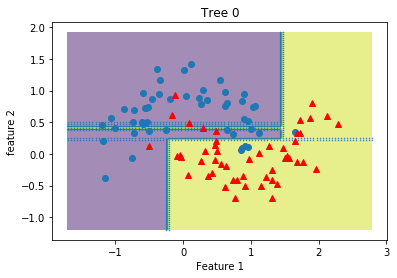

In [11]:
#plottin each of the tree for analysis
plot_tree_predictor (forest.estimators_[0])
plt.title('Tree 0')    


Text(0.5,1,'Tree 1')

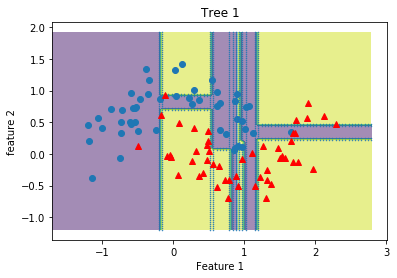

In [12]:
plot_tree_predictor (forest.estimators_[1])
plt.title('Tree 1') 

Text(0.5,1,'Tree 2')

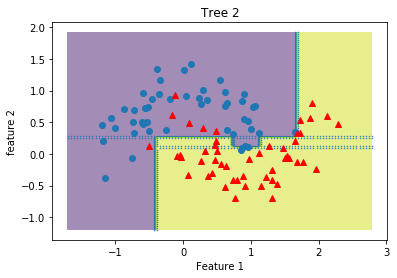

In [13]:
plot_tree_predictor (forest.estimators_[2])
plt.title('Tree 2') 

Text(0.5,1,'Tree 3')

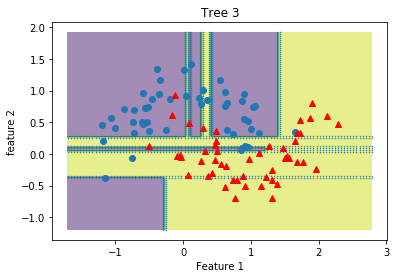

In [14]:
plot_tree_predictor (forest.estimators_[3])
plt.title('Tree 3') 

Text(0.5,1,'Tree 4')

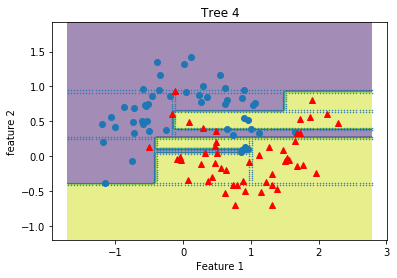

In [15]:
plot_tree_predictor (forest.estimators_[4])
plt.title('Tree 4') 

In [16]:
#plotting the decision boundary
def plot_2D_boundary():    
    eps = 0.5
    x_min , x_max = X[: , 0].min() - eps , X[: , 0].max() + eps
    y_min , y_max = X[: , 1].min() - eps , X[: , 1].max() + eps
    xx = np.linspace (x_min , x_max , 100)
    yy = np.linspace (y_min , y_max , 100)

    X1 , X2 = np.meshgrid (xx , yy)
    X_grid = np.c_[X1.ravel() , X2.ravel()]

    Z = forest.predict(X_grid).reshape(X1.shape)

    plot_data_points()
    plt.contourf(X1 , X2 , Z , alpha = 0.5 )
    

Text(0.5,1,'Decision boundary')

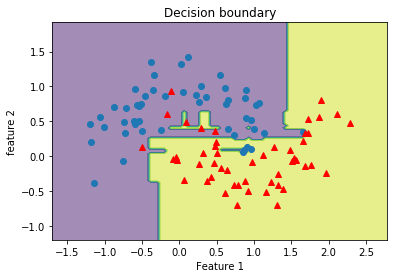

In [17]:
plot_2D_boundary()
plt.title('Decision boundary')
#note for the above trees , not all trees completely overfit the training set since training set available to each set
#is different because of bootstrap sampling
#In real life we use even larger number of trees for the smoother boundaries

In [18]:
#Using random forest on Breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [19]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target)

In [20]:
forest2 = RandomForestClassifier(n_estimators = 150 , random_state = 0)
forest2.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
print("Training accuracy : " , forest2.score(X_train , y_train))
print("Test accuracy : " , forest2.score(X_test , y_test))

Training accuracy :  1.0
Test accuracy :  0.965034965034965


Text(0,0.5,'Features')

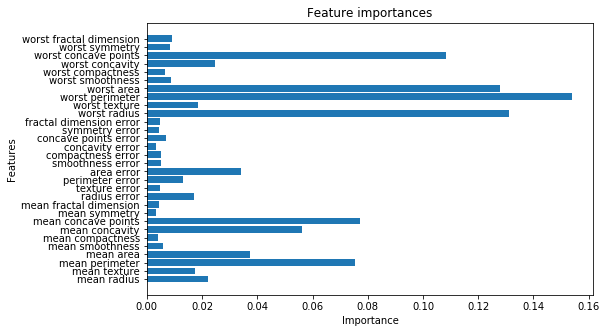

In [26]:
#plotting the feature importances
plt.figure(figsize = (8 , 5))
n_features = cancer.data.shape[1]
plt.barh(range(n_features) , forest2.feature_importances_ , align = 'center')
plt.yticks(np.arange(n_features) , cancer.feature_names)
plt.title("Feature importances")
plt.xlabel("Importance")
plt.ylabel("Features")
#unlike the decision tree , the features are important
#most of the features are non zero in making the decision
#it covers much broder area as compared to the single decision tree
#n_jobs parameter is used to specify the number of core to be used for computing
#n_jobs = -1 , means all the cores of the computer should be used